<a href="https://colab.research.google.com/github/mounika-durga/Big_Mart_Sales/blob/main/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [105]:
# loading the dataset from csv file to a Pandas Dataframe
big_mart_data = pd.read_csv('/content/Train.csv')

In [106]:
# first 5 rows of the dataframe
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [107]:
#number of data points & number of features
big_mart_data.shape

(8523, 12)

In [108]:
# getting some information about the dataset
big_mart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [109]:
# checking for missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,1463
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [110]:
# Handling missing values using mean/mode.. mean-> Average values, mode -> most repeated values
big_mart_data['Item_Weight'].mean()

12.857645184135976

In [111]:
# filling the missing values in "Item_Weight" column with "mean" value
mean_weight = big_mart_data['Item_Weight'].mean()
big_mart_data = big_mart_data.fillna({'Item_Weight': mean_weight})

In [112]:
# checking for missing values again; found that outlet_size still has missing values
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,2410
Outlet_Location_Type,0


In [177]:
#Replacing the missing values in "Outlet_Size " with mode
mode_of_outlet_size = big_mart_data.pivot_table(values='Outlet_Size', columns= 'Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

In [143]:
print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
Outlet_Size         Small             Small            Medium            Medium


In [144]:
missing_values = big_mart_data['Outlet_Size'].isnull()

In [145]:
print(missing_values)

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [146]:
big_mart_data.loc[missing_values, 'Outlet_Size'] = big_mart_data.loc[missing_values, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size)

In [147]:
#checking for missing values again
big_mart_data.isnull().sum()

,0
Item_Identifier,0
Item_Weight,0
Item_Fat_Content,0
Item_Visibility,0
Item_Type,0
Item_MRP,0
Outlet_Identifier,0
Outlet_Establishment_Year,0
Outlet_Size,0
Outlet_Location_Type,0


In [148]:
# describe function gives statistical measures about the data
big_mart_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<Figure size 600x600 with 0 Axes>

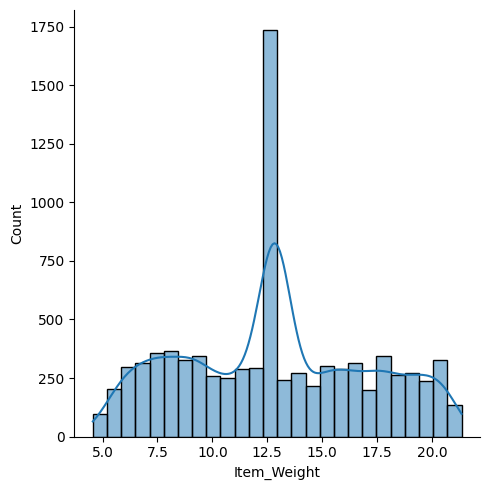

In [149]:
# Item_Weight distribution
plt.figure(figsize=(6, 6))
sns.displot(big_mart_data['Item_Weight'], kde=True)  # kde=True shows the kernel density estimate
plt.show()

<Figure size 600x600 with 0 Axes>

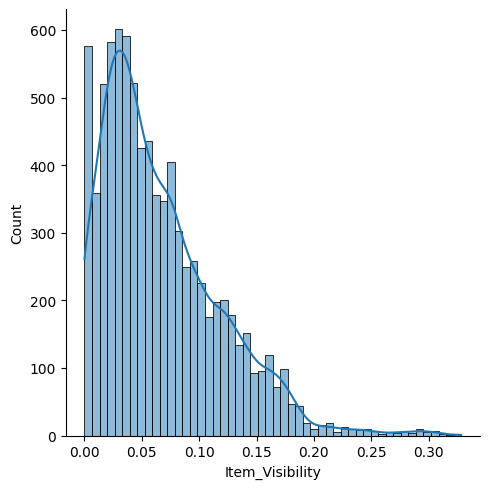

In [150]:
# Item_Visibility distribution
plt.figure(figsize=(6, 6))
sns.displot(big_mart_data['Item_Visibility'], kde=True)  # kde=True shows the kernel density estimate
plt.show()

<Figure size 600x600 with 0 Axes>

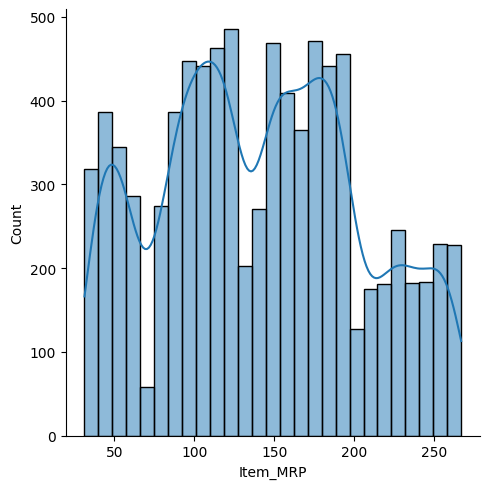

In [151]:
# Item_MRP distribution
plt.figure(figsize=(6, 6))
sns.displot(big_mart_data['Item_MRP'], kde=True)  # kde=True shows the kernel density estimate
plt.show()

<Figure size 600x600 with 0 Axes>

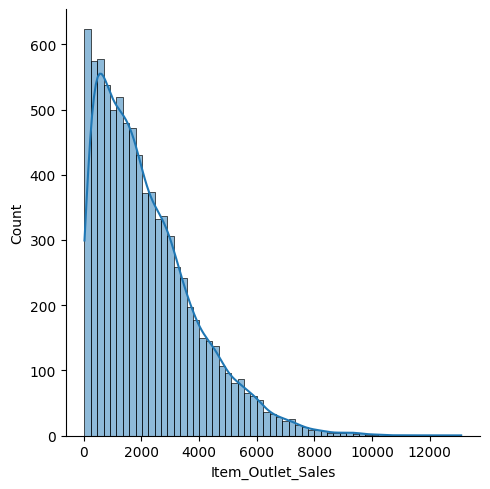

In [152]:
# Item_Outlet_Sales distribution
plt.figure(figsize=(6, 6))
sns.displot(big_mart_data['Item_Outlet_Sales'], kde=True)  # kde=True shows the kernel density estimate
plt.show()

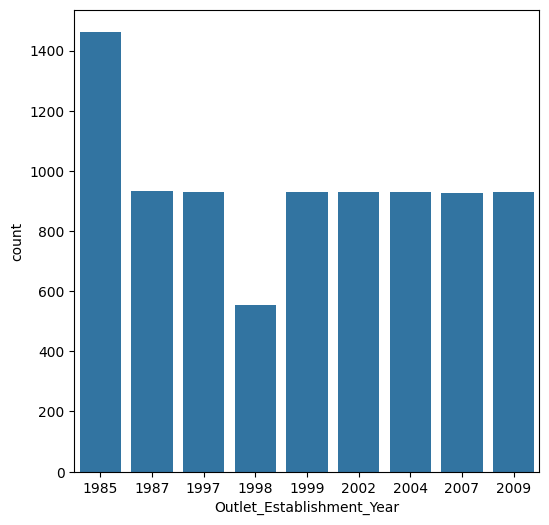

In [153]:
# Outlet_Establishment_Year
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Establishment_Year', data=big_mart_data)
plt.show()


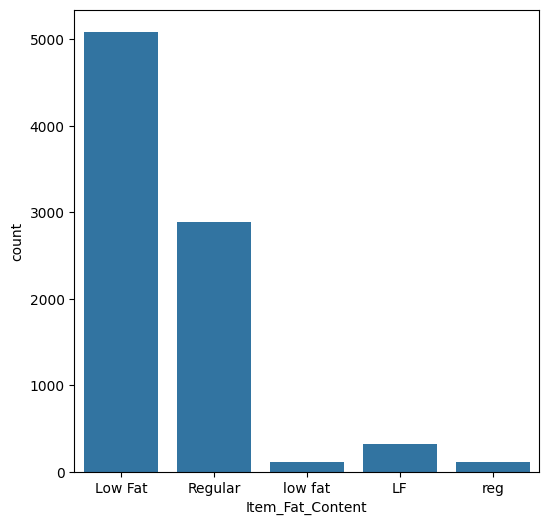

In [154]:
# Categorical features
# Item_Fat_Content
plt.figure(figsize=(6, 6))
sns.countplot(x='Item_Fat_Content', data=big_mart_data)
plt.show()


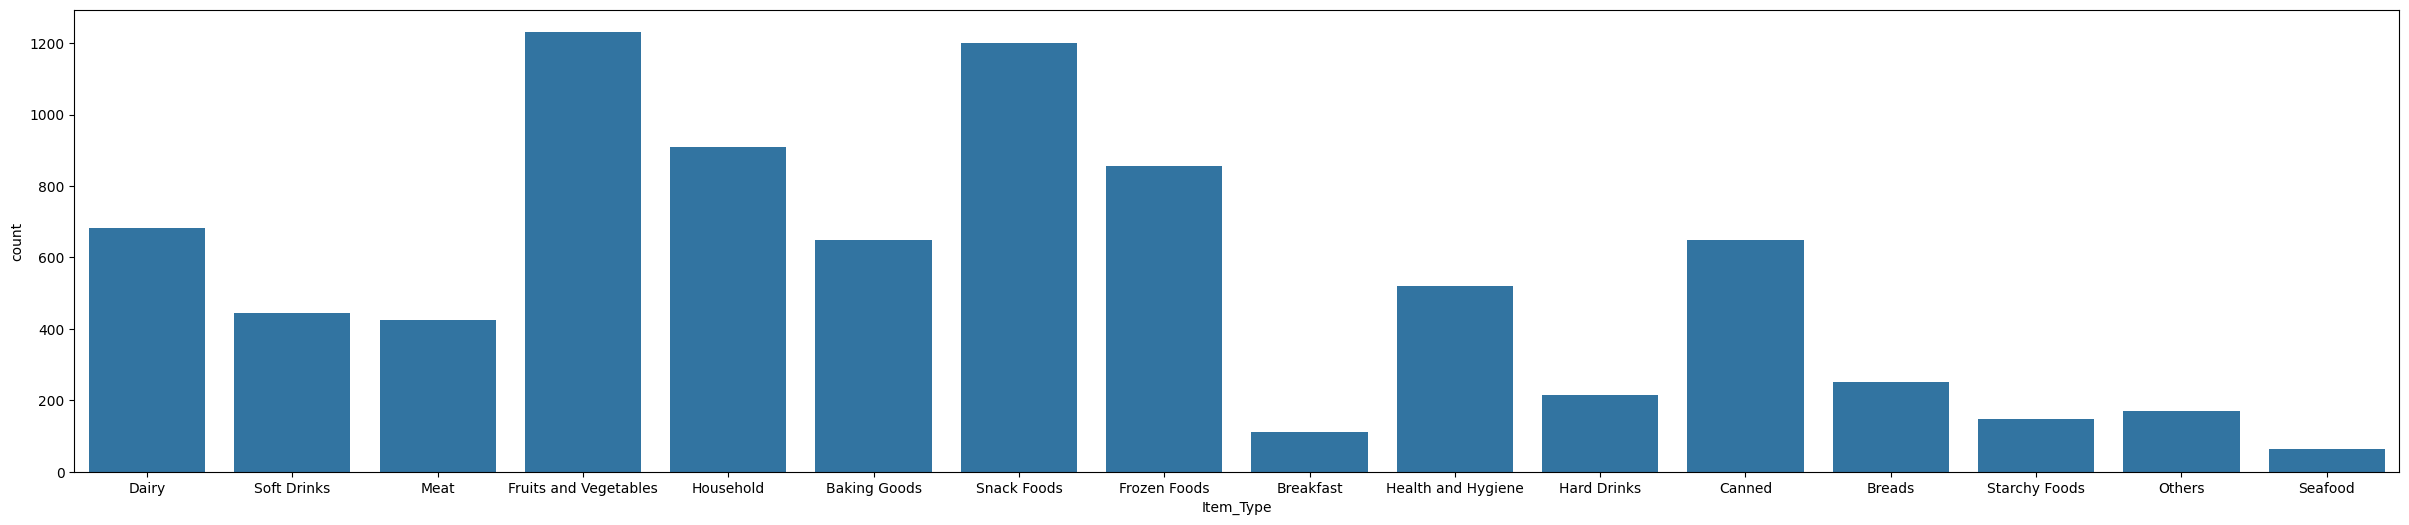

In [155]:
# Categorical features
# Item_Type
plt.figure(figsize=(30, 6))
sns.countplot(x='Item_Type', data=big_mart_data)
plt.show()

In [169]:
# Calculate the mode of 'Outlet_Size'
outlet_size_mode = big_mart_data['Outlet_Size'].mode()[0]  # mode() returns a Series, so take the first element


In [191]:
# Explicitly convert 'Outlet_Size' to string type
big_mart_data['Outlet_Size'] = big_mart_data['Outlet_Size'].astype(str)

In [192]:
big_mart_data = big_mart_data.fillna({'Outlet_Size': outlet_size_mode})

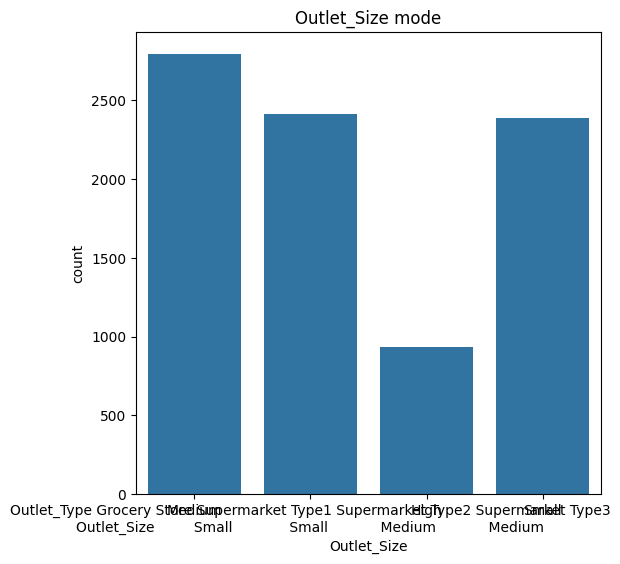

In [193]:
# Create the countplot
plt.figure(figsize=(6, 6))
sns.countplot(x='Outlet_Size', data=big_mart_data)
plt.title('Outlet_Size mode')
plt.show()

Data Preprocessing

In [194]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Outlet_Type Grocery Store Supermarket Type1 Su...,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [202]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5089
Regular,2889
LF,316
reg,117
low fat,112


In [205]:
big_mart_data.replace({'Item_Fat_Content':{'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace = True)

In [206]:
big_mart_data['Item_Fat_Content'].value_counts()

,count
Item_Fat_Content,
Low Fat,5517
Regular,3006


In [207]:
#Label Encoding
encoder = LabelEncoder()

In [208]:
big_mart_data['Item_Identifier']= encoder.fit_transform(big_mart_data['Item_Identifier'])

big_mart_data['Item_Fat_Content']= encoder.fit_transform(big_mart_data['Item_Fat_Content'])

big_mart_data['Item_Type']= encoder.fit_transform(big_mart_data['Item_Type'])

big_mart_data['Outlet_Identifier']= encoder.fit_transform(big_mart_data['Outlet_Identifier'])

big_mart_data['Outlet_Size']= encoder.fit_transform(big_mart_data['Outlet_Size'])

big_mart_data['Outlet_Location_Type']= encoder.fit_transform(big_mart_data['Outlet_Location_Type'])

big_mart_data['Outlet_Type']= encoder.fit_transform(big_mart_data['Outlet_Type'])


In [209]:
big_mart_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


In [210]:
# Splitting Features and Target
X = big_mart_data.drop(columns='Item_Outlet_Sales', axis=1)
Y = big_mart_data['Item_Outlet_Sales']

In [211]:
print(X)

      Item_Identifier  Item_Weight  ...  Outlet_Location_Type  Outlet_Type
0                 156        9.300  ...                     0            1
1                   8        5.920  ...                     2            2
2                 662       17.500  ...                     0            1
3                1121       19.200  ...                     2            0
4                1297        8.930  ...                     2            1
...               ...          ...  ...                   ...          ...
8518              370        6.865  ...                     2            1
8519              897        8.380  ...                     1            1
8520             1357       10.600  ...                     1            1
8521              681        7.210  ...                     2            2
8522               50       14.800  ...                     0            1

[8523 rows x 11 columns]


In [212]:
print(Y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [213]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [214]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [215]:
# Machine Level Model Training
# XGBoost Regressor
regressor = XGBRegressor()

In [217]:
regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [218]:
#Prediction on Training Data
training_data_prediction = regressor.predict(X_train)

In [227]:
# R squared Value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared value = ', r2_train)

R Squared value =  0.879565708425905


In [220]:
#Prediction on Testing Data
testing_data_prediction = regressor.predict(X_test)

In [228]:
# R squared Value
r2_test = metrics.r2_score(Y_test, testing_data_prediction)
print('R Squared value = ', r2_test)

R Squared value =  0.5075841838320172


In [235]:
# Load the test dataset
test_data = pd.read_csv('/content/test_data.csv')

In [236]:
# Preprocess the test data (same steps as training data)
test_data['Item_Weight'] = test_data['Item_Weight'].fillna(mean_weight)

In [237]:
missing_values_test = test_data['Outlet_Size'].isnull()
test_data.loc[missing_values_test, 'Outlet_Size'] = test_data.loc[missing_values_test, 'Outlet_Type'].apply(lambda x: mode_of_outlet_size.values[0])
test_data['Outlet_Size'] = test_data['Outlet_Size'].astype(str)

In [238]:
test_data.replace({'Item_Fat_Content': {'low fat': 'Low Fat', 'LF': 'Low Fat', 'reg': 'Regular'}}, inplace=True)

In [239]:
test_data['Item_Identifier'] = encoder.fit_transform(test_data['Item_Identifier'])
test_data['Item_Fat_Content'] = encoder.fit_transform(test_data['Item_Fat_Content'])
test_data['Item_Type'] = encoder.fit_transform(test_data['Item_Type'])
test_data['Outlet_Identifier'] = encoder.fit_transform(test_data['Outlet_Identifier'])
test_data['Outlet_Size'] = encoder.fit_transform(test_data['Outlet_Size'])
test_data['Outlet_Location_Type'] = encoder.fit_transform(test_data['Outlet_Location_Type'])
test_data['Outlet_Type'] = encoder.fit_transform(test_data['Outlet_Type'])

In [240]:
# Make predictions on the test data
test_predictions = regressor.predict(test_data)

In [241]:
# Create the submission DataFrame
submission = pd.DataFrame({
    'Item_Identifier': test_data['Item_Identifier'],
    'Outlet_Identifier': test_data['Outlet_Identifier'],
    'Item_Outlet_Sales': test_predictions
})

In [242]:
# Save the submission DataFrame to a CSV file
submission.to_csv('/content/submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")

Submission file 'submission.csv' created successfully.
